In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:

X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]


In [6]:

single_image.shape

(28, 28)

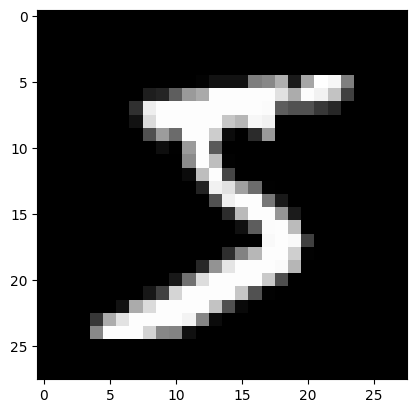

In [7]:

plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape


(60000,)

In [9]:

X_train.min()

0

In [10]:

X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:

X_train_scaled.min()



0.0

In [13]:

X_train_scaled.max()

1.0

In [14]:

y_train[0]


5

In [15]:

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [16]:
type(y_train_onehot)


numpy.ndarray

In [17]:

y_train_onehot.shape

(60000, 10)

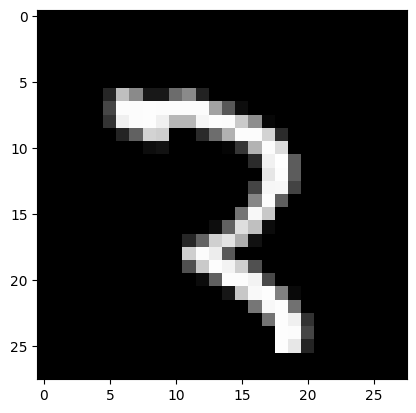

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')


In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [26]:
model = keras.Sequential()
# Write your code here
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [30]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 29s 27ms/step - loss: 0.2560 - accuracy: 0.9263 - val_loss: 0.0936 - val_accuracy: 0.9720
Epoch 2/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0834 - accuracy: 0.9755 - val_loss: 0.0670 - val_accuracy: 0.9783
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0584 - accuracy: 0.9826 - val_loss: 0.0560 - val_accuracy: 0.9822
Epoch 4/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.0559 - val_accuracy: 0.9810
Epoch 5/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0491 - val_accuracy: 0.9827


In [31]:
metrics = pd.DataFrame(model.history.history)

In [32]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.256007,0.926350,0.093615,0.9720
1,0.083439,0.975550,0.067022,0.9783
2,0.058390,0.982567,0.056008,0.9822
3,0.045639,0.986350,0.055948,0.9810
4,0.036987,0.988667,0.049051,0.9827


<Axes: >

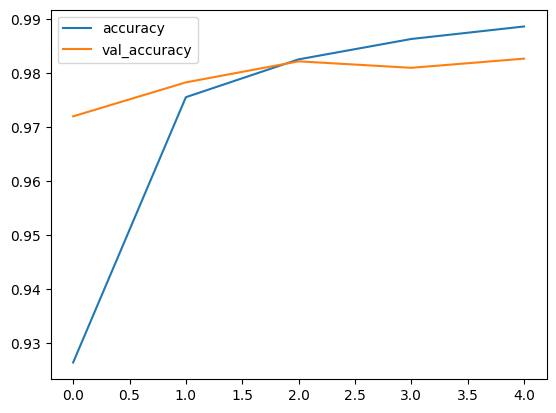

In [33]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

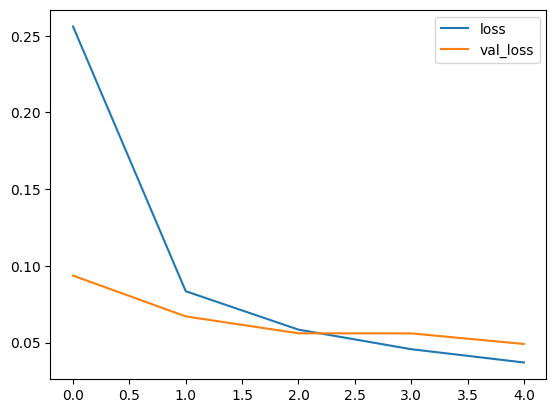

In [34]:
metrics[['loss','val_loss']].plot()


In [35]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 6ms/step


In [36]:

print(confusion_matrix(y_test,x_test_predictions))

[[ 970    0    1    0    1    1    3    2    2    0]
 [   0 1132    2    0    0    0    0    1    0    0]
 [   1    2 1016    2    1    0    0    7    3    0]
 [   0    0    5  979    0    5    0   11    5    5]
 [   0    1    0    0  970    0    2    3    1    5]
 [   2    0    0    6    0  875    4    0    2    3]
 [   2    3    0    0    3    3  946    0    1    0]
 [   0    0    8    1    0    0    0 1015    1    3]
 [   4    0    3    0    4    1    1    6  951    4]
 [   1    2    0    1    9    1    0   19    3  973]]


In [37]:

print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.95      0.99      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [38]:
img = image.load_img('image18.jpeg')

In [39]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [41]:
img = image.load_img('image18.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [42]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [43]:

print(x_single_prediction)

[2]


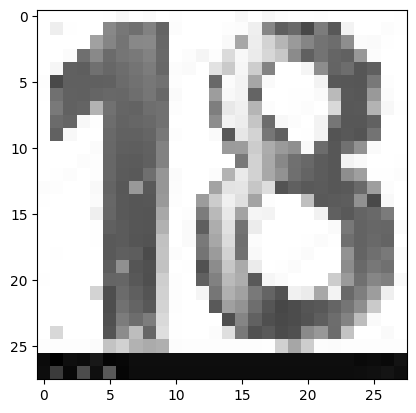

In [44]:

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [45]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [46]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 30ms/step


In [47]:
print(x_single_prediction)

[5]
